In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.9.2'

##Setting and Preparing the data

In [ ]:
#Import the fashion mnist dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

##Taking a look the data

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

#Process the data

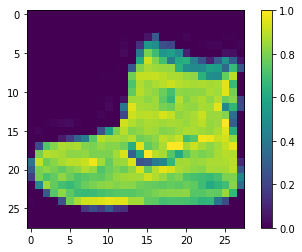

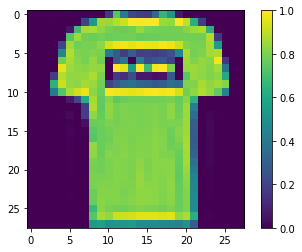

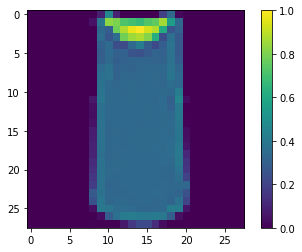

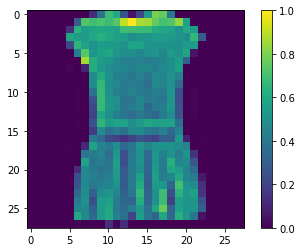

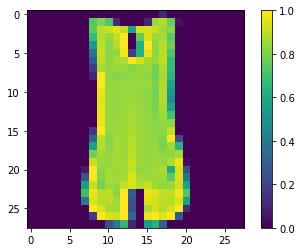

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
for i in range(5):
  plt.imshow(train_images[i])

  plt.colorbar()
  plt.grid(False)
  plt.show()


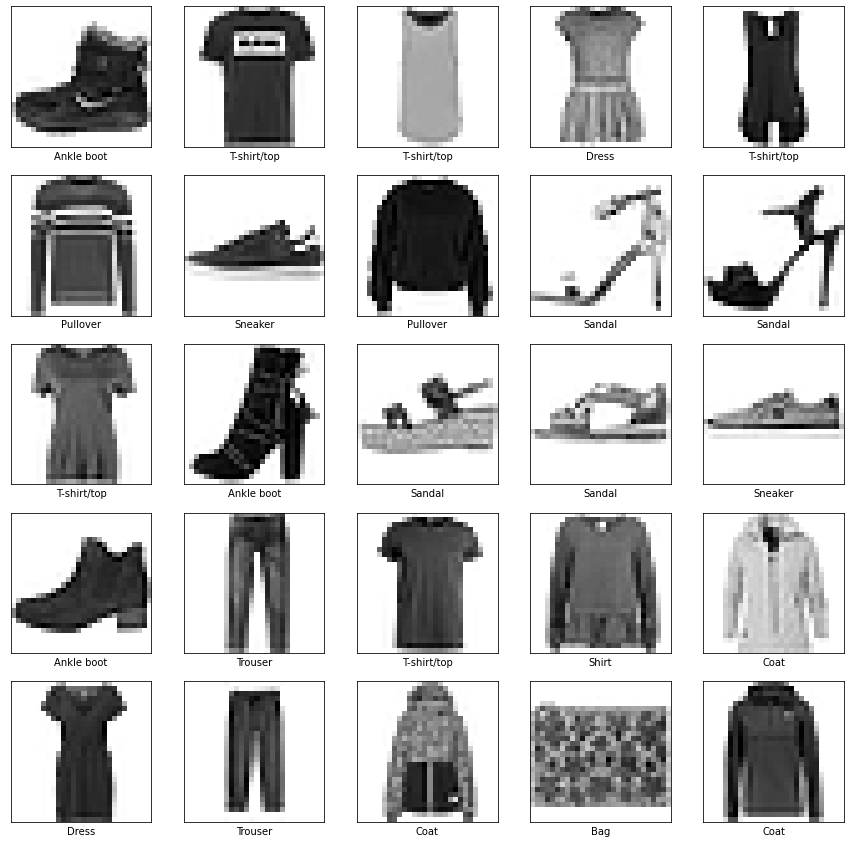

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


##Model

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(10))


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 7s 2ms/step - loss: 0.5377 - accuracy: 0.8138
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4566 - accuracy: 0.8401
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4404 - accuracy: 0.8465
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4313 - accuracy: 0.8489
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4229 - accuracy: 0.8518
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4191 - accuracy: 0.8538
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4172 - accuracy: 0.8534
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4108 - accuracy: 0.8557
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4075 - accuracy: 0.8573
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.403

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print("Test accuracy:", test_acc)
print("Loss: ", test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.4572 - accuracy: 0.8418
Test accuracy: 0.8417999744415283
Loss:  0.4571920335292816


In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)


313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions[0]  

array([4.2876582e-08, 4.7840783e-11, 4.5361321e-07, 1.9430006e-07,
       1.8706730e-07, 1.9964762e-01, 1.1837684e-06, 2.2929739e-02,
       3.6542982e-04, 7.7705508e-01], dtype=float32)

In [ ]:
import numpy as np
np.argmax(predictions[0])



9

In [ ]:
test_labels[0]


9

##Use The Model

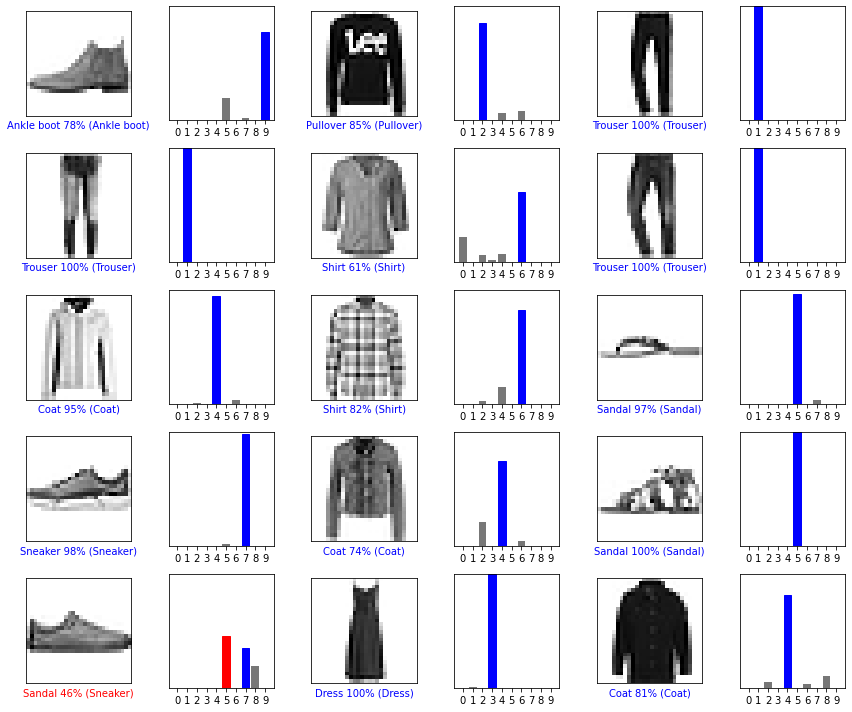

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Plot the first X test images, their predicted labels, and the true labels.

# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()



##Confusion Matrix

In [ ]:
#Make predictions
y_probs = model.predict(test_images)

#Convert prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


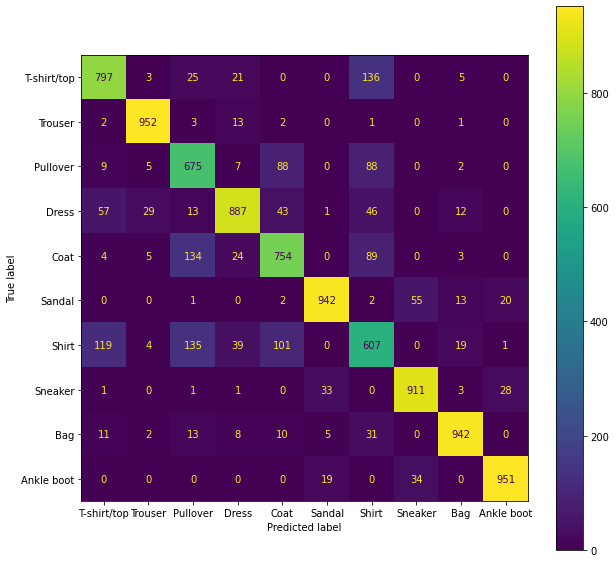

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
#Confusion matrix

cm=confusion_matrix(y_preds,test_labels)
#Plot
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);